# A PyTorch Workflow

## 1. Data (preparing and loading)

There are two steps in any process involving Machine Learning:

1. Represent **any** data numerically.
2. Build and/or train a model to learn patterns contained implicitely in the data.

In the example that follows, we will create numerical data (step 1) using a linear regression formula (a linear function) and we will create a model that will learn to associate the values of the dependent variable with the corresponding ones of the dependent variable. So, in essence, it will figure out what is the slope (or gradient) and the intercept with the y-axis.

In [2]:
import torch

#*Set known parameters (to be predicted by the model)
weight: int = 0.7 #*Gradient
bias: int = 0.3 #*y-axis intercept

#*Generate data
start: float = 0
end: float = 1
step: float = 0.02
#*Generate 50 consecutive values of the independent variable
X: torch.Tensor = torch.arange(start, end, step).unsqueeze(dim=1)
#*Compute the 50 corresponding values of the dependent variable using the linear regression formula
y: torch.Tensor = weight * X + bias
print(X[:10], len(X))
print(y[:10], len(y))

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) 50
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]]) 50


> - Unsure why is `y` not capital if it's a tensor, even if it looks like a vector (since it's 2-dimensional).
> - By unsqueezing in dimension 1, we get a more vector-like representation of the data, since it's now organized by multiple rows and a single column.

### **Splitting data into training, validation and test sets**

This is one of the most crucial parts -if not the most- of representing data numerically. On it depends how good your model is in theory (training sets) and in practice (validation and test sets).

Especially when dealing with limited or uneven data (in my view, data in which you don't have the same amount corresponding to each category or label), it needs to be carefully done.

For reference, here is a table of the usage frequency and distribution of the three sets:

| Split           | Purpose                                                                 | Amount of total data | How often is it used?       |
| --------------- | ----------------------------------------------------------------------- | -------------------- | --------------------------- |
| **Training set**| The model learns from this data (like the course materials you study during the semester). | **~60-80%** | Always|
| **Validation set** | The model gets tuned on this data (like the practice exam you take before the final exam). | **~10-20%**| Often but not always (like sometimes getting a practice exam from your prof and sometimes not)|
| **Testing set** | The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester). | **~10-20%**| Always|

> .
> 
> Validations sets are mainly required when optimizing the hyperparameters of the model and improving the model's generalization by detecting over-fitting.

For the example we are in, we won't use a validation set since we know the parameters and the relation between the data is known in advance.

In [3]:

#*Create a test/train split (80% / 20%)
training_split = int(0.8 * len(X))
X_training, y_training = X[:training_split], y[:training_split]
X_test, y_test = X[training_split:], y[training_split:]

To "visualize, visualize, visualize!" the data, you can use MatplotLib, just as follows:

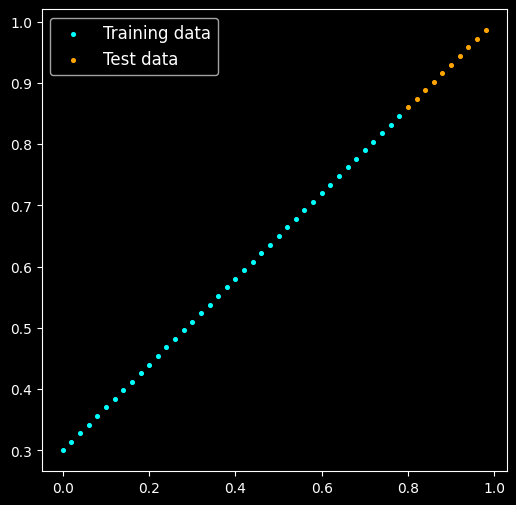

In [4]:
import matplotlib.pyplot as plt

def plot_predictions(train_data: torch.Tensor, train_labels: torch.Tensor, test_data: torch.Tensor, test_labels: torch.Tensor, predictions = None) -> None:
    plt.style.use("dark_background")
    plt.figure(figsize=(6, 6))

    #*Plot the train and test data
    plt.scatter(x=train_data, y=train_labels, s=7, c="cyan", label="Training data") #*s is the size of the dots
    plt.scatter(x=test_data, y=test_labels, s=7, c="orange", label="Test data")

    #*Show predictions if there are any
    if predictions is not None:
        plt.scatter(x=test_data, y=predictions, s=10, c="red", label="Predictions")

    plt.legend(prop={"size": 12}) #*Shows the labels of all the scattered data

plot_predictions(X_training, y_training, X_test, y_test)

## 2. Building model

Reminder: the goal of the model is to predict (or get as close to) the values of the weight and bias that were known from earlier (0.7 and 0.3, respectively). In consequence, the model will do the following:

- Start with random values of bias and weight.
- Look through the training data and update the weight and the bias to match the known values.

The parameters are updated following two algorithms:
1. Gradient descent.
2. Backpropagation.

The underlying idea of the two algorithms is to find the weights and bias that minimize the cost function of the network, which is the sum of the differences of the activations (or values) of the neurons in the output layer after the model was run and the expected activations in the same layer. 

Now, since the cost function is a function in n dimensions, where n is the number of neurons in the input layer, it is usually hard to visualize. However, if you restrained it to three dimensions, you would find a bunch of valleys and mountains. The goal of the algorithms is to change the weights and the bias to get to the lowest (or closest-to-the-sea) valley.

Since the cost function will probably have a lot of local minimums (the valleys), the algorithms won't always minimize the cost as much as they could. However, that's something to be measured with testing, and they may be good enough even if not perfect.

Back to the algorithms, they can be described as follows:

- Gradient descent: Direct calculation of the cost function's gradient descent by means of Calculus. When using it, you tend to find the shortest path to the "best" valley, but it is computationally costly.
- Backpropagation: It also involves finding the gradient descent, but it does so by taking a weird route but ultimately getting to the "best" valley. In short, it is a recursive algorithm that computes the ideal weights and biases of a single example by going (propagating) backwards from the output layer to the input layer. It adds and keeps track of the changes that need to be done to each neuron activation and ends up changing the weights and biases accordingly.

In the following implementation, gradient descent will be used (which doesn't rule out the possibility of backpropagation being involved too)



In [ ]:
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        """Initializes an instance of a linear regression model with a random weight and bias"""
        super().__init__()
        self.training = True
        self.weight: nn.Parameter = nn.Parameter(data=torch.randn(1, dtype=torch.float), requires_grad=True) #*Scalar
        self.bias: nn.Parameter = nn.Parameter(data=torch.randn(1, requires_grad=True, dtype=torch.float)) #*Scalar

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        This method will define the computation in the model.
        
        Args
        ----

        x: torch.Tensor
            The input data or tensor (in this implementation, the training data)
        """
        return self.weight * x + self.bias #* ax + b

if __name__ == "__main__":
    RANDOM_SEED = 42
    torch.manual_seed(RANDOM_SEED)

    model = LinearRegressionModel()
    # print(model.weight.requires_grad)
    # print(model.bias.requires_grad)

    print(model)
    for model_parameter in model.parameters():
        print(model_parameter)
    print(model.state_dict())

LinearRegressionModel()
Parameter containing:
tensor([0.3367], requires_grad=True)
Parameter containing:
tensor([0.1288], requires_grad=True)
OrderedDict({'weight': tensor([0.3367]), 'bias': tensor([0.1288])})
Named Modules:
Layer name: , Layer type: LinearRegressionModel




> The argument for `requires_grad` in `nn.Parameter` will override that of `data`. Therefore, if no value is specified, the output tensor will always require gradient descent. If set to False, again, as a parameter of `nn.Parameter` and not of the data tensor, it won't require gradient descent.

#### `nn`

It's short for **neural network**, and it is a submodule of PyTorch that contains the "building blocks for graphs", on which neural networks are based (they are, in fact, computational graphs).

A quick glance at the documentation tells you it contains all the layers and functions you will need for the construction of neural networks.

##### `nn.Module`

This is a container in the `nn` submodule. Almost *any* neural network will need to inherit from this module, since its their base class in PyTorch.

Its only public attribute is `training`, which I believe is just for reference in implementations where it is relevant to know if a model is being trained or not. The interesting stuff appears when you look at its methods; it contains all the necessary ones to train and test a neural network module.

> For a subclass of `nn.Module` to be considered a neural network module, as suggested by the docs, it needs to override the `forward` method implemented. It won't through an exception if it's not, but it is recommended to do so even if there's nothing in the method yet.

##### `nn.Parameter`

Any instance of this class will be a tensor that is a parameter of an `nn.Module`, so a weight or a bias in the implementation.

The reason behind this class is that "one might want to cache some temporary state, like last hidden state of the RNN, in the model. If there was no such class as Parameter, these temporaries would get registered too". This means, since a parameter stored in `self.parameters()` will be trained as it is considered a weight or a bias, the distinction needs to be made between actual attributes and parameters of the model.

To visualize how are the parameters being stored internally, you can use `self.parameters()` to get a generator containing all of the model's parameters or `self.state_dict()` to get a dictionary where the keys are the names of the parameters and the values the corresponding tensors (it will also store buffers, so bear that in mind).

##### `torch.optim`

##### `torch.utils.data.Dataset`

##### `torch.utils.data.DataLoader`

### Making predictions with a model

Predictions are the output you will get when you pass some features or input data to the model. They are made using, mainly, the `forward` method called inside `torch.inference_mode()`, a context manager that optimizes the execution.

#### `torch.inference_model()`

As said before, it is a context manager that removes some unnecessary process when that are mostly required for training. Specifically, it disables gradient calculation (which can also be done with the `torch.no_grad()` method), view tracking and other actions that are not necessary when not doing model training or other things. Therefore, they are "ignored" or removed so more memory is available and the more relevant processes take less time.



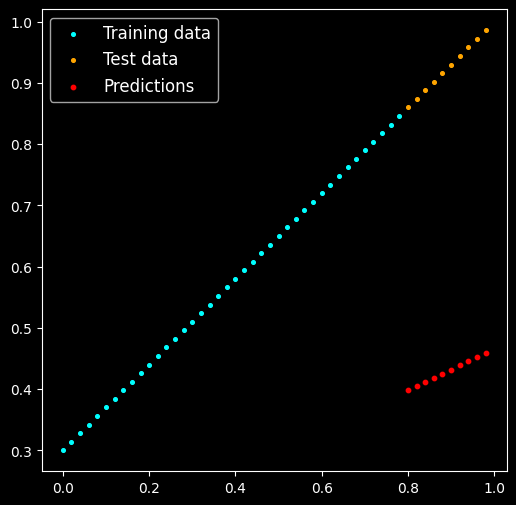

In [6]:
with torch.inference_mode():
    y_predictions = model(X_test)

plot_predictions(X_training, y_training, X_test, y_test, y_predictions)

In [7]:

#* Inference mode can also be used as a decorator
@torch.inference_mode()
def compute_y_predictions(x: torch.Tensor) -> torch.Tensor:
    return model(x)

# plot_predictions(X_training, y_training, X_test, y_test, compute_y_predictions(X_test))

## 3. Training model

The goal of this step is for a model to update its parameters (weights and bias) so that they are as close as possible to some known parameters, or in other words, so that the predictions you make with it are as good as possible.

To do so, you need two things: an optimizer to update the parameters so that they get closer to the known ones, and a loss function, to measure how good the current parameters are compared to the known ones (based on the predictions made with them).

### Loss function

Measures how good a prediction is, and therefore, how good the given parameters are, based on how much does it diverge from the expected output.

It is also known as cost function (as when discussing gradient descent and backpropagation) and criterion (used in PyTorch docs).

Some of the most common examples are MAE (Minimum Absolute Error), MSE (Minimum Squared Error) and Binary Cross Entropy.

The ones supported by PyTorch can be found in [here](https://pytorch.org/docs/stable/nn.html#loss-functions), a section of the documentation of `nn`. Note that they are implemented as objects, and it's because of the calculations associated to the loss function and the model, like backpropagation.

### Optimizer

It is an algorithm that minimizes the loss function by updating the parameters given an output and its loss.

In PyTorch, optimizers are implemented as objects. Mainly because there are actions inside the algorithms that are executed using multiple methods and auxiliary methods to collect data about the state of the optimization. Also, something to bear in mind is that they are initialized with two mandatory arguments: `params` and `lr`, respectively, the parameters you want to update to minimize the loss function and the learning rate.

An advantage of implementing them this way is that you can create subclasses from the base class `torch.optim.Optimizer`, which provides enough flexibility and simplicity to allow for more complex and/or specific implementation (I may be wrong, but this may be useful when you're training a reinforcement-learning agent and you need to set an environment on which the loss function and the `step` method which updates the parameters).

The oldest and most general one is Stochastic Gradient Descent (SGD), which, along other more-refined algorithms such as Adam and its variants, are implemented in PyTorch as classes. More info on them can be found [here](https://pytorch.org/docs/stable/optim.html#algorithms).

On the other hand, in PyTorch you will need a **training loop** and a **test loop**.

In [8]:

#*Choosing a loss function (MAE in this case)
loss_fn: nn.L1Loss = nn.L1Loss()

#*Instantiating an optimizer
optimizer: torch.optim.SGD = torch.optim.SGD(params=model.parameters(), lr=0.01)

> Just so you know, the loss "function" needs to be called because you're instantiating a class in PyTorch, therefore, otherwise you will be creating an object when you calculate the loss instead of actually calculating it.

#### Learning rate (`lr`)

It lets the optimizer know how big the change it would make to the parameters can be. Therefore, the parameters will be updated by no more than the learning rate and with a sensitivity accordingly, so if one of your model's parameter is `0.8352` and `lr = 0.01`, then the updated parameter will be withing the range `[0.8452, 0.8252]`.

Now, as the parameters get closer and closer to convergence or the global minima of the loss function, they shouldn't take steps as big as when they were at the top of a "mountain". This is taken into account in what's called **learning rate scheduling**, which I will dare to also call **adaptative learning rate**.

##### Learning rate scheduling

It means computing a new learning rate per each epoch, based on at least one parameter known (usually the initial learning rate, but in some it can be the max and min learning rates for example).

Some examples are step, exponential and staircase exponential decay. You can find more about them [here](https://medium.com/@theom/a-very-short-visual-introduction-to-learning-rate-schedulers-with-code-189eddffdb00)

### Training loop

It is extremely rare and even risky to try and optimize a model in a single step, since the learning rate would be relatively high and the predictions may not be as good as needed. In consequence, the most common process is to iterate a set amount of times through a few steps that update the parameters using the loss function, the optimizer, and other algorithms and methods. These steps are:

|Step                   | What does it do?                                                                                     | Code example                     |
|-------------------------------|-------------------------------------------------------------------------------------------------------|-----------------------------------|
| 1. Forward pass                 | The model goes through all of the training data once, performing its `forward()` function(s) (there could be multiple) calculations. In other words, it goes through the hidden layers of the model to reach the output one. | `model(x_train)`                 |
| 2. Calculate the loss           | The model's outputs (predictions) are compared to the ground truth (the test data) and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)` |
| 3. Zero gradients               | The optimizer's gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. If this step is skipped, all the previous gradients will be added to the current one, so, using the analogy of going down a mountain, you may end up in the wrong valley, not moving at all, or going in the opposite direction than the fastest route downhill. | `optimizer.zero_grad()`          |
| 4.  Perform backpropagation on the loss | Computes the gradient of the loss with respect to every model parameter to be updated (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence "backwards". | `loss.backward()`                |
| 5. Update the optimizer (**gradient descent**) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()`               |

> The gradients are tracked every time you do a `loos.backward()` call.

### Test loop

Testing is usually incorporated inside the training loop since you want to evaluate how good is the model after a certain amount of epochs have elapsed.

To do this, you go through four steps (although two are optional):

| Step name | What does it do? | Code example |
| --------------- | ---------------- | ------------ |
| 1. Forward pass | The model goes through all of the testing data once, performing its `forward()` function calculations. | `model(x_test)` |
| 2. Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_test)` |
| 3. Calculate evaluation metrics (optional) | Alongside the loss value you may want to calculate other evaluation metrics such as accuracy on the test set. | Custom functions |
| 4. Track experiments (optional) | You may want to store the epochs and corresponding training and testing losses to visualize them creating loss curves, and/or for future models | `append`ing all the relevant data for every `epoch % n == 0` |

Since you will be iterating a finite amount of times through this steps, there is a hyperparameter that you can set: `epochs`, which is the amount of times yo go through the loop.

Epoch: 0 | Training loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict({'weight': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 9 | Training loss: 0.20919232070446014 | Test loss: 0.3598262071609497
OrderedDict({'weight': tensor([0.3757]), 'bias': tensor([0.2288])})
Epoch: 19 | Training loss: 0.09681284427642822 | Test loss: 0.22817862033843994
OrderedDict({'weight': tensor([0.4146]), 'bias': tensor([0.3258])})
Epoch: 29 | Training loss: 0.0545857772231102 | Test loss: 0.14967669546604156
OrderedDict({'weight': tensor([0.4483]), 'bias': tensor([0.3743])})
Epoch: 39 | Training loss: 0.04591871052980423 | Test loss: 0.11538954079151154
OrderedDict({'weight': tensor([0.4728]), 'bias': tensor([0.3868])})
Epoch: 49 | Training loss: 0.04202762991189957 | Test loss: 0.10030148178339005
OrderedDict({'weight': tensor([0.4920]), 'bias': tensor([0.3848])})
Epoch: 59 | Training loss: 0.0385376438498497 | Test loss: 0.08928143978118896
OrderedDict({'weight': tensor([0.5100

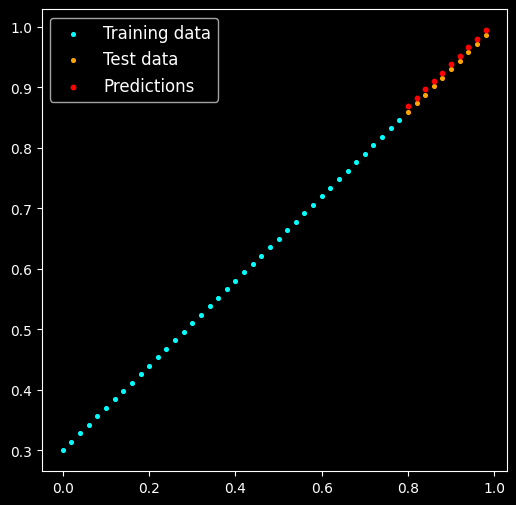

In [9]:

#!To run, run all the previous cells in the notebook or it may save the model's updated parameters after training
epochs = 200

#*Lists to keep track of the loss to make the loss curves and maybe for other models
epoch_count: list[torch.Tensor] = []
loss_values: list[torch.Tensor] = []
test_loss_values: list[torch.Tensor] = []

#*Training and testing loop (they usually go together)
for epoch in range(epochs):
    #*TRAINING
    model.train(mode=True) #*True is the default arg

    y_predictions = model(X_training) #* 1
    
    loss: nn.L1Loss = loss_fn(y_predictions, y_training) #* 2
    
    optimizer.zero_grad() #* 3
    
    loss.backward() #* 4
    
    optimizer.step() #* 5

    #*The loss keeps reducing in every epoch, so the predictions are getting closer to the target labels
    # print(loss, model.state_dict())

    #*TESTING
    model.eval() #*Equivalent to model.train(False)
    if (epoch + 1) % 10 == 0 or epoch == 0:
        with torch.inference_mode():
            test_predictions = model(X_test)
            test_loss = loss_fn(test_predictions, y_test)
        print(f"Epoch: {epoch} | Training loss: {loss} | Test loss: {test_loss}")
        print(model.state_dict())
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)

with torch.inference_mode():
    y_predictions = model(X_test)
    plot_predictions(X_training, y_training, X_test, y_test, y_predictions)

print(model.state_dict())


>Something interesting that's happenning is that the loss bounces back-and-forth between two values somewhere after the 160th epoch. This is because the learning rate has "hit its limit", i.e., it is too big to update the parameters so that they minimize even more the loss. Therefore, this is a good example why choosing the appropriate learning rate (whether adaptive or not), is crucial for the model's predictions' accuracy.

> `module.eval()` and `module.train()` have specific implementations depending on the module. For instance, `Dropout` and `BatchNorm2d` behave differently depending on which method was called previously. It is a good practice to use them even if you are not sure they will have any effect (they do not turn off gradient calculations by default).

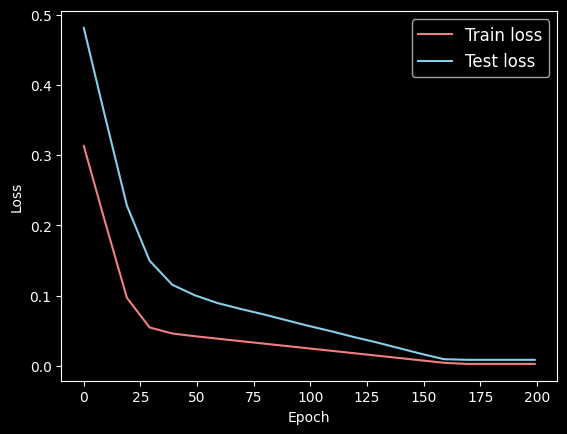

In [10]:

#*Generating the loss curve with the tracked data
with torch.no_grad():
    plt.plot(epoch_count, loss_values, "lightcoral", label="Train loss")
plt.plot(epoch_count, test_loss_values, "skyblue", label="Test loss")

plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(prop={"size": 12})

>Since the loss values are calculated in the training loop, the tensors they are stored in have `require_grad` set to `True` because they are needed for the training calculations. In consequence, context managers like `no_grad` or `inference_mode` can be used to set the requirement to false and be able to convert them to NumPy arrays.

## 4. Save and load model

There are two ways to save/load a model:

1. Saving/Loading an object or parts of one in a file using `pickle`'s methods.
2. Saving/Loading an entire model in a file.

No matter which way you choose, a common PyTorch convention is to store the information in a file with the extension `.pt` or `.pth`. 

Now, before diving into saving and loading, you should know a bit about the `pickle` built-in module.

### Pickling and unpickling

Pickling itself is the process of storing food in containers full of a certain liquid to extend their shelf life. Although it's a weird choice to name something related to objects in Python, it makes sense: *pickling an object* is the process of converting it to a stream of bytes and store it somewhere so that you can then access it even after running time (successfully extending its lifespan). Accordingly, *unpickling* is the inverse process: taking a valid stream of bytes and converting them to a Python object.

They are also known as serializing and de-serializing, respectively, which are the terms used for the same processes outside of Python -more generally.

Under the hood, when PyTorch saves and loads a model, it is pickling and unpickling objects, respectively, using `pickle`'s methods.

>Note: Unpickling an object may be unsafe since it could execute malitious code.

### Saving and loading a state dictionary (recommended)

A **state dictionary** is a Python dictionary that maps a layer to its corresponding parameter (tensor). It is an attribute of an `nn.Module` child and it's accessed via `module.state_dict()`.

This method uses state dictionaries to save and load modules, because if you think about it, it keeps track of the main characterstics of the model: the layers and their corresponding learnable parameters.

#### Saving

You just need a relative (to the path you are executing the file from) path where you want to store the state dictionary and the `torch.save` method:

In [19]:
from pathlib import Path

Path("models").mkdir(parents=True, exist_ok=True) #*Creates parents if needed too and doesn't raise an error if the directory already exists

torch.save(obj=model.state_dict(), f="models/model0.pt")

#### Loading

Once the model is saved in a file, you need the relative path of the file, the an instance of the target model's class, the `model.load_state_dict` method and the `torch.save` method to load the state dictionary:

In [ ]:
model_loaded = LinearRegressionModel()
model_loaded.load_state_dict(torch.load(f="models/model0.pt", weights_only=True))
model_loaded.eval()

<All keys matched successfully>

>Note: The `weights_only` parameter of `torch.load` seems to be preferred because it has restricted functions so it is safer. However, I am not exactly sure, so if an error like `UnpicklingError` pops up, check [this](https://pytorch.org/docs/stable/notes/serialization.html#weights-only) article here.

>Also, it is recommended to call `eval` if doing inference, since this will set the some of the components of the module to evaluation mode.

### Saving and loading an instance of a model

It is almost the same syntax as when loading a state dictionary:

In [26]:

#*Saving
torch.save(model, f="models/model0.pt")

#*Loading
model_loaded: LinearRegressionModel = torch.load(f="models/model0.pt", weights_only=False)
model_loaded.eval()

LinearRegressionModel()

This approach requires the `weights_only` option set to `False` because `pickle` probably needs access to more things since it is loading an entire object.

One of the disadvantages of this approach is precisely that: since `pickle` requires access to the object's class, it saves a path to the file where the object's path is stored, which may brake the code. Also, although it needs further practice to confirm, it may be less efficient both in terms of memory and time.

## All together

OrderedDict({'weight': tensor([1.3863], device='cuda:0'), 'bias': tensor([0.6504], device='cuda:0')})
Epoch 0 | Train loss: 0.8058322668075562 | Test loss: 1.1798248291015625
Parameters: OrderedDict({'weight': tensor([1.3963], device='cuda:0'), 'bias': tensor([0.6604], device='cuda:0')})
Epoch 10 | Train loss: 0.7442304491996765 | Test loss: 1.444852352142334
Parameters: OrderedDict({'weight': tensor([1.4488], device='cuda:0'), 'bias': tensor([0.7594], device='cuda:0')})
Epoch 20 | Train loss: 0.6874960660934448 | Test loss: 1.3586609363555908
Parameters: OrderedDict({'weight': tensor([1.3911], device='cuda:0'), 'bias': tensor([0.8557], device='cuda:0')})
Epoch 30 | Train loss: 0.6292069554328918 | Test loss: 1.217538595199585
Parameters: OrderedDict({'weight': tensor([1.3157], device='cuda:0'), 'bias': tensor([0.9531], device='cuda:0')})
Epoch 40 | Train loss: 0.5702745914459229 | Test loss: 1.0880945920944214
Parameters: OrderedDict({'weight': tensor([1.2436], device='cuda:0'), 'bias

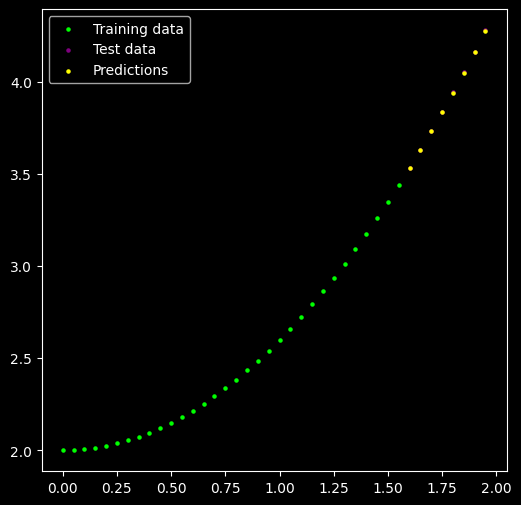

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

torch.manual_seed(27)
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device=device)


#*1. Turning the data into tensors

target_weight: float = 0.6
target_bias: float = 2
x_arr = [x/20 for x in range(40)]
y_arr: list = [((target_weight * ((x)**2)) + target_bias) for x in x_arr]
# print(y_arr, len(y_arr))
data_split: int = int(len(y_arr) * 0.8)
X_tensor: torch.Tensor = torch.Tensor(x_arr).cuda().unsqueeze(dim=1)
Y_tensor: torch.Tensor = torch.Tensor(y_arr).cuda().unsqueeze(dim=1)
X_train: torch.Tensor = X_tensor[:data_split]
Y_train: torch.Tensor = Y_tensor[:data_split]
X_test: torch.Tensor = X_tensor[data_split:]
Y_test: torch.Tensor = Y_tensor[data_split:]


#*2. Build a model

class LinearRegressionModelCopy(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight: torch.Tensor = nn.Parameter(data=torch.randn(1), requires_grad=True)
        self.bias: torch.Tensor = nn.Parameter(data=torch.rand(1), requires_grad=True)

        #*2.1. Pick a loss function and an optimizer

        self.loss_fn: nn.L1Loss = nn.L1Loss()
        self.optimizer = torch.optim.Adam(params=self.parameters(), lr=0.01)

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.weight * (X**2) + self.bias #*ax^2 + c
    
    def train_loop(self, X_train: torch.Tensor, Y_train: torch.Tensor) -> str:
        """
        Runs an epoch of the training loop of the model and returns the training loss.

        Args
        ----

        X_train: torch.Tensor
            Tensor containing the training features

        Y_train: torch.Tensor
            Tensor containing the training labels.
        """
        self.train(True)

        Y_predictions = self(X_train)

        loss = self.loss_fn(Y_predictions, Y_train)

        self.optimizer.zero_grad()

        loss.backward()

        self.optimizer.step()

        return loss

    def test_loop(self, X_test: torch.Tensor, Y_test: torch.Tensor) -> str:
        """
        Runs an epoch of the testing loop of the model and returns the test loss.

        Args
        ----

        X_test: torch.Tensor
            Tensor containing the training features

        Y_test: torch.Tensor
            Tensor containing the training labels.
        """
        self.eval()
        with torch.inference_mode():
            Y_predictions = self(X_test)
            loss = self.loss_fn(Y_predictions, Y_test)
        return loss
    
    @torch.inference_mode()
    def plot_predictions(self, X_train: torch.Tensor, Y_train: torch.Tensor, X_test: torch.Tensor, Y_test: torch.Tensor, predictions: torch.Tensor) -> None:
        plt.style.use("dark_background")
        plt.figure(figsize=(6, 6))

        plt.scatter(x=X_train.cpu(), y=Y_train.cpu(), s=5, c="lime", label="Training data")
        plt.scatter(x=X_test.cpu(), y=Y_test.cpu(), s=5, c="purple", label="Test data")

        if predictions is not None:
            plt.scatter(x=X_test.cpu(), y=predictions.cpu(), s=5, c="yellow", label="Predictions")

        plt.legend()

    
model = LinearRegressionModelCopy()
print(model.state_dict())

#*2.2. Build a training (and test) loop

epochs: int = 240

for i in range(epochs):
    train_loss: str = model.train_loop(X_train, Y_train)
    test_loss: str = model.test_loop(X_test, Y_test)
        

    #*4. Evaluate the model
    if i % 10 == 0:
        print(f"Epoch {i} | Train loss: {train_loss} | Test loss: {test_loss}")
        print(f"Parameters: {model.state_dict()}")


#*3. (Fit the model to the data and) make a prediction 

Y_predictions: torch.Tensor = model(X_test)
model.plot_predictions(X_train, Y_train, X_test, Y_test, Y_predictions)


#*5. Improve through experimentation

For step 5 (improve through experimentation), what I did was to play around with the epochs at first, because the optimizer seemed to not be working at all since it overshot the weight and bias and the predictions were nowhere close where we needed them to be. Therefore, I increased the number of epochs and after 240 the predictions fitted the test data perfectly.

Also, I tried to change the optimizer to SGD, but Adam did a much better work, so I sticked with it (the predictions done with SGD didn't completely aligned with the test data after 500 epochs).

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')


/tmp/ipykernel_5502/3555359731.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_PATH))


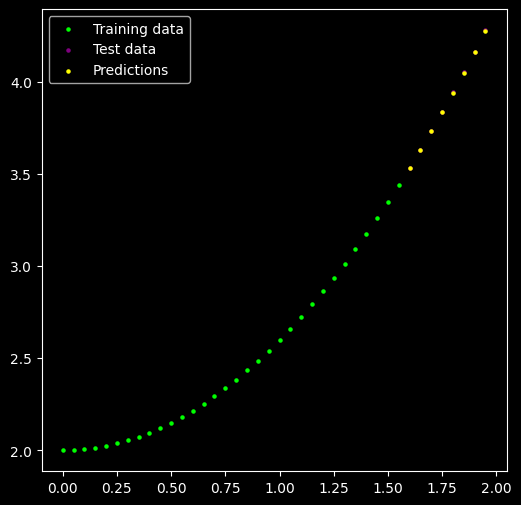

In [41]:
import torch
from pathlib import Path

#*6. Save and load the model

Path("models").mkdir(parents=True, exist_ok=True)
MODEL_PATH: str = "models/model0_v2.pt"
torch.save(obj=model.state_dict(), f=MODEL_PATH)

loaded_model: LinearRegressionModelCopy = LinearRegressionModelCopy()
loaded_model.load_state_dict(torch.load(f=MODEL_PATH))

loaded_model_predictions: torch.Tensor = loaded_model(X_test)
print(Y_predictions == loaded_model_predictions)
model.plot_predictions(X_train, Y_train, X_test, Y_test, loaded_model_predictions)